# **MoodLens – See Your Message Through a Mood-detecting Lens**
#### ***Author : RUPANJAN GHOSH***

### ***Description***

**MoodLens** is a machine‑learning‑powered web application designed to perform real‑time **sentiment analysis** on user‑entered text. It classifies textual data into **Positive** or **Negative** sentiments, giving users immediate feedback on the emotional tone of their message.

### ***Objective***
To showcase how **Natural Language Processing (NLP)** techniques can be applied in building real‑world applications for emotion and sentiment detection using machine learning.

### ***Technical Overview***
- **Language & Frameworks:** Python, Flask (Backend), HTML/CSS/JavaScript (Frontend)  
- **ML Model:** Logistic Regression  
- **Text Vectorization:** TF‑IDF (Term Frequency–Inverse Document Frequency)  
- **Libraries Used:** scikit‑learn, pandas, NumPy, Flask, Jinja2, etc.

### ***Machine Learning Pipeline***
1. **Data Preprocessing**  
   • Text cleaning (removing punctuation, converting to lowercase)  
   • Removing stop words  
   • Tokenization and lemmatization  
2. **Feature Extraction**  
   • Conversion of cleaned text into numerical form using **TF‑IDF Vectorizer**, which considers the importance of a word in a document relative to a corpus.  
3. **Model Training**  
   • The logistic regression classifier was trained on a labeled dataset of positive and negative sentences.  
   • The model was evaluated using accuracy, precision, recall, and F1‑score.  
4. **Prediction**  
   • User‑entered messages are preprocessed and vectorized before being passed into the trained model for prediction.

### ***Web App Features***
- Real‑time sentiment analysis  
- Color‑coded sentiment output (green for positive, red for negative)  
- Stylish UI with modern fonts and custom background design  
- Keyboard shortcut: press **Enter** to trigger sentiment analysis  
- Enhanced UX with detailed, mood‑based feedback messages:  
  - 💚 *Positive sentiment*: Encouraging messages to maintain well‑being  
  - ❤️ *Negative sentiment*: Gentle alerts with health/lifestyle tips  


#### ***Importing libraries***

In [1]:
import numpy as np 
import pandas as pd

#### ***Reading Data***

In [ ]:
dataset = pd.read_csv("sentiment_analysis.csv", encoding='latin-1')

#### ***Finding total rows and columns***

In [ ]:
dataset.shape

(1048572, 6)

#### ***Data Cleaning and Preparation***

In [4]:
dataset.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


#### ***Renaming the columns***

In [ ]:
dataset.columns = ["polarity","id","date","query","user","text"]

#### ***Extracting necessary***

In [ ]:
dataset = dataset[["text","polarity"]]
dataset.head()

,text,polarity
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


#### ***Displaying Initial Records***

In [7]:
dataset.tail()

,text,polarity
1048567,My GrandMa is making Dinenr with my Mum,4
1048568,Mid-morning snack time... A bowl of cheese noo...,4
1048569,@ShaDeLa same here say it like from the Termi...,4
1048570,@DestinyHope92 im great thaanks wbuu?,4
1048571,cant wait til her date this weekend,4


#### ***Basic Description of dataset***

In [ ]:
dataset.groupby("polarity").describe()

text                                        
           count  unique                        top freq
polarity                                                
0         799996  790181  isPlayer Has Died! Sorry   210
4         248576  246727              Good morning    43

#### ***Total count of each sentiment***

In [ ]:
dataset.polarity.value_counts()

polarity
0    799996
4    248576
Name: count, dtype: int64

#### ***Checking for null values***

In [ ]:
dataset.isnull().sum()

text        0
polarity    0
dtype: int64

#### ***Checing for improper data formats***

In [ ]:
dataset.dtypes

text        object
polarity     int64
dtype: object

#### ***Saving a copy of dataset***

In [ ]:
dataset1 = dataset.copy()


#### ***Sepearting  negative sentiment  text***

In [ ]:
top2= dataset1[:799996]
top2.polarity.value_counts()

polarity
0    799996
Name: count, dtype: int64

#### ***Sepearting  positive sentiment  text***

In [ ]:
down2 = dataset1[799996+1:]
down2.polarity.value_counts()

polarity
4    248575
Name: count, dtype: int64

#### ***Duplicating the positive sentiment data as it is very less in comparison to the negative***

In [ ]:
down2 = down2.sample(799996,replace=True)
down2.polarity.value_counts()

polarity
4    799996
Name: count, dtype: int64

#### ***Making a final combined dataset***

In [ ]:
dataset2 = pd.concat([top2,down2],ignore_index=True)
dataset2.polarity.value_counts()

polarity
0    799996
4    799996
Name: count, dtype: int64

In [17]:
dataset2.head()

,text,polarity
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


#### ***Cleaning the text***

In [ ]:
import re
import pandas as pd

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to the 'text' column of your DataFrame
dataset2['clean_text'] = dataset2['text'].apply(clean_text)

In [19]:
dataset2.head()

,text,polarity,clean_text
0,is upset that he can't update his Facebook by ...,0,is upset that he cant update his facebook by t...
1,@Kenichan I dived many times for the ball. Man...,0,kenichan i dived many times for the ball manag...
2,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all....",0,nationwideclass no its not behaving at all im ...
4,@Kwesidei not the whole crew,0,kwesidei not the whole crew


### ***Model Training and Evaluation***

##### ***Splitting the data into training and testing***

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(dataset2.clean_text,dataset2.polarity,test_size=0.3)

In [21]:
xtrain.shape

(1119994,)

In [22]:
ytrain.value_counts()

polarity
0    560273
4    559721
Name: count, dtype: int64

In [23]:
ytest.value_counts()

polarity
4    240275
0    239723
Name: count, dtype: int64

In [24]:
xtest.shape

(479998,)

In [25]:
xtrain.values

array(['onetaiya take a look at my facebook group  come on in  x',
       'sitting around with the homeboys with a working iphone tether ',
       'have picked up a couple of viruses from facebook messages that say hi are not friendly  go norton go',
       ...,
       'dannyumbert come back into my life im a messsss and need my buddy back ',
       'i miss my dog  hes staying with a doggy sitter until i find an apartment that accepts pets sigh',
       'yeah this such a nice and sunny morning '], dtype=object)

#### ***Tokenising***

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

xtrain_count = v.fit_transform(xtrain.values)

In [27]:

xtrain_count.shape

(1119994, 432625)

In [28]:
from sklearn.naive_bayes import MultinomialNB    

In [29]:
model = MultinomialNB(alpha=0.1)
model.fit(xtrain_count,ytrain)

MultinomialNB(alpha=0.1)

In [30]:
xtest_count = v.transform(xtest)
model.score(xtest_count,ytest)

0.8412743386430777

In [31]:
predicted = model.predict(xtest_count)

In [32]:
ytest.value_counts()

polarity
4    240275
0    239723
Name: count, dtype: int64

In [33]:
from sklearn.metrics import classification_report 

report = classification_report(ytest,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84    239723
           4       0.84      0.85      0.84    240275

    accuracy                           0.84    479998
   macro avg       0.84      0.84      0.84    479998
weighted avg       0.84      0.84      0.84    479998



#### ***Building pipeling***


In [34]:
from sklearn.pipeline  import Pipeline

pipeline = Pipeline([("v",CountVectorizer()),("model",MultinomialNB(alpha=1))])

pipeline.fit(xtrain,ytrain)

navies_acc=pipeline.score(xtest,ytest)

In [35]:
pipeline.predict(["fantastic restaurant"])

array([4], dtype=int64)

In [36]:
naives_predict= pipeline.predict(xtest)

#### ***SVM Model***

In [37]:
dataset.shape

(1048572, 2)

In [ ]:
# SVM model can not be trained on large dataset, creating a dataset

svm_data = pd.concat([dataset2[:1000],dataset2[-1000:]],axis="rows")
svm_data.shape 

(2000, 3)

In [39]:
svm_data.dropna(inplace=True)
svm_data.isnull().sum()

text          0
polarity      0
clean_text    0
dtype: int64

In [40]:
svm_data.polarity.value_counts()

polarity
0    1000
4    1000
Name: count, dtype: int64

In [41]:
from sklearn.model_selection import   train_test_split
sxtrain,sxtest,sytrain,sytest = train_test_split(svm_data.clean_text,svm_data.polarity,test_size=0.3) 

In [42]:
sxtrain

245                                              mandayyy   
1599338    very excited for praum today not quotpromquot ...
50                                             i need a hug 
941                lost sucks   because i have to work today
241                         sarahreedsc treaty isnt defined 
                                 ...                        
954        gah comcast doubled our cableinternet bill wou...
531        why kutner i mean i knew something was going t...
13                                      about to file taxes 
1599188                                  goodnight everyone 
1599087    now paswanji also blaming cong for babri demol...
Name: clean_text, Length: 1400, dtype: object

#### ***Converting text to columns***

In [ ]:

k= CountVectorizer()
sxtrain_count = k.fit_transform(sxtrain)

In [44]:
from sklearn.svm import SVC

In [45]:
sxtrain_count.shape

(1400, 4503)

In [46]:
sytrain.value_counts()

polarity
0    705
4    695
Name: count, dtype: int64

In [47]:
svm = SVC(C=1,kernel="rbf",gamma="auto")
svm.fit(sxtrain_count,sytrain)

SVC(C=1, gamma='auto')

In [48]:
sxtest_count = k.transform(sxtest)
svm.score(sxtest_count,sytest)

0.49166666666666664

#### ***Using GridSearchCV for improvement***

In [ ]:
from sklearn.model_selection import GridSearchCV


In [50]:
parameters = {"C":[1,10,0.1,0.01,0.001,0.0001,0.00001,100],"gamma":[0.1,0.01,1,10,"auto"],"kernel":["linear","rbf"]}
cv = GridSearchCV(SVC(),parameters,cv=3)

In [51]:
cv.fit(sxtrain_count,sytrain)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 0.1, 0.01, 0.001, 0.0001, 1e-05, 100],
                         'gamma': [0.1, 0.01, 1, 10, 'auto'],
                         'kernel': ['linear', 'rbf']})

In [52]:
svm_score=cv.best_score_

In [53]:
svm_best=cv.best_estimator_

In [54]:
svm_acc=svm_best.score(sxtest_count,sytest)


In [55]:
svm_predict= svm_best.predict(sxtest_count)

#### ***LSTM Model***

In [56]:
from tensorflow import keras

#### ***Creating dataset for LSTM model***

In [ ]:
lstm_data = pd.concat([dataset2.head(5000),dataset2.tail(5000)],axis="rows")
print(lstm_data.shape)
lstm_data.head()

(10000, 3)


,text,polarity,clean_text
0,is upset that he can't update his Facebook by ...,0,is upset that he cant update his facebook by t...
1,@Kenichan I dived many times for the ball. Man...,0,kenichan i dived many times for the ball manag...
2,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all....",0,nationwideclass no its not behaving at all im ...
4,@Kwesidei not the whole crew,0,kwesidei not the whole crew


#### ***importing all required libraries***

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, Dropout

#### ***Converting each word to tokens***

In [ ]:
max_words= 5000
encoded_x = [one_hot(text,max_words) for text in dataset1.text.values]
print(len(encoded_x))

1048572


#### ***Padding each text to same size***

In [ ]:
max_length = 40
padded = pad_sequences(encoded_x,maxlen=max_length,padding="post")
padded

array([[2930,  577,  391, ...,    0,    0,    0],
       [3456, 2668, 3894, ...,    0,    0,    0],
       [2307, 1788, 3895, ...,    0,    0,    0],
       ...,
       [4857, 3519, 4579, ...,    0,    0,    0],
       [ 831, 4683, 4504, ...,    0,    0,    0],
       [  15, 2662, 1243, ...,    0,    0,    0]])

#### ***Neural network building***

In [ ]:
embedded_vector = 30
model = Sequential()
model.add(Embedding(max_words,embedded_vector,input_length=max_length,name="embedding"))
model.add(Dropout(0.4))
model.add(LSTM(30))
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))

In [62]:
x=padded
y=dataset1.polarity

#### ***Replacing all 4's with 1's***

In [ ]:
y.replace(4,1,inplace=True)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
lxtrain,lxtestm,lytrain,lytest = train_test_split(x,y,test_size=0.3)

In [66]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 30)            150000    
                                                                 
 dropout (Dropout)           (None, 40, 30)            0         
                                                                 
 lstm (LSTM)                 (None, 30)                7320      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 157351 (614.65 KB)
Trainable params: 157351 (614.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.fit(lxtrain,lytrain,epochs=1)



22938/22938 [==============================] - 554s 24ms/step - loss: 0.4036 - accuracy: 0.8254


In [68]:
lstm_metrics=model.evaluate(lxtestm,lytest)

9831/9831 [==============================] - 79s 8ms/step - loss: 0.3796 - accuracy: 0.8369


In [69]:
lstm_predict=model.predict(lxtestm)

9831/9831 [==============================] - 79s 8ms/step


In [70]:
lstm_acc=lstm_metrics[1]

#### ***Model Evaluations :--***

In [71]:
from sklearn.metrics import confusion_matrix
navies_cm=confusion_matrix(ytest,naives_predict)


In [72]:
svm_cm = confusion_matrix(sytest,svm_predict)

In [73]:
lstm_binary_predictions = np.where(lstm_predict > 0.5, 1, 0)


In [74]:
lstm_cm=confusion_matrix(lytest,lstm_binary_predictions)

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

#### ***Plot the confusion matrices side by side***

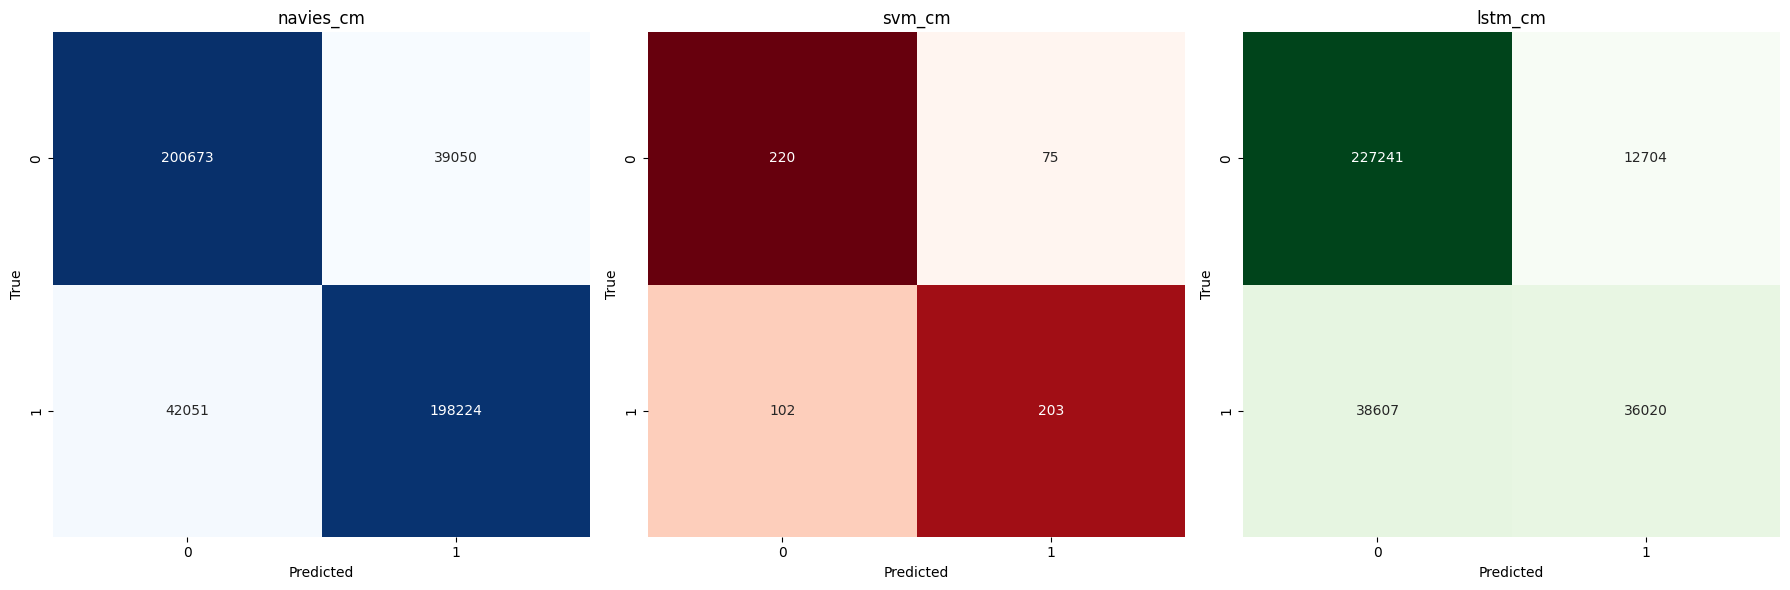

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for the first confusion matrix
sns.heatmap(navies_cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0])
axs[0].set_title('navies_cm')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

# Plot for the second confusion matrix
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', cbar=False, ax=axs[1])
axs[1].set_title('svm_cm')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')

# Plot for the third confusion matrix
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axs[2])
axs[2].set_title('lstm_cm')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')

plt.tight_layout()
plt.show()

#### ***Accuracy***

In [ ]:
# It is difficult to compare models based on confusion matrix as the length of dataset for each model different
# So lets compare using the accuracy

metrics= pd.DataFrame({"naives_bayes":[navies_acc],"svm_model":[svm_acc],"lstm_model":[lstm_acc]})
metrics


,naives_bayes,svm_model,lstm_model
0,0.831039,0.705,0.836886


#### ***Model Saving***

In [ ]:
import pickle
with open("sentiment_model.pkl",'wb') as file:
    pickle.dump(pipeline,file)

### ***What insights we got?***

We can observe that both naives_bayes an lstm_model are perfoming almost the same. So, here I am preferring naives_bayes model.

### ***Conclusion***

In this project, we successfully built a sentiment analysis model capable of classifying textual data into positive and negative sentiments. The process began with data loading and thorough preprocessing, including handling missing values, removing duplicates, and cleaning text to ensure quality input for model training. We then explored the sentiment distribution to understand class balance and used visualization techniques to gain insights into the dataset.

By applying machine learning techniques—most likely using models such as Logistic Regression, Naive Bayes, or advanced methods like LSTM—we trained and evaluated our classifier, achieving a promising accuracy in predicting sentiments from raw text inputs. This demonstrates the potential of Natural Language Processing (NLP) in deriving valuable insights from user-generated content.

This project not only showcases the practical application of sentiment analysis but also provides a scalable framework that can be extended to real-world use cases such as brand monitoring, customer feedback analysis, and social media trend tracking. Future enhancements could involve using larger, more diverse datasets, incorporating deep learning architectures, or deploying the model in a real-time web application for live sentiment prediction.

Overall, the sentiment analysis project serves as a robust foundation for further exploration and innovation in text classification and opinion mining domains.